In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Carregando os dados

In [2]:
# carrega o dataset
df_dsa = pd.read_csv('dataset.csv')

In [3]:
df_dsa.shape

(500, 2)

In [4]:
df_dsa.columns


Index(['horas_estudo_mes', 'salario'], dtype='object')

In [5]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [8]:
df_dsa.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [11]:
df_dsa.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

# Analise exploratoria


In [10]:
df_dsa.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [12]:
df_dsa.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [13]:
df_dsa["horas_estudo_mes"].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

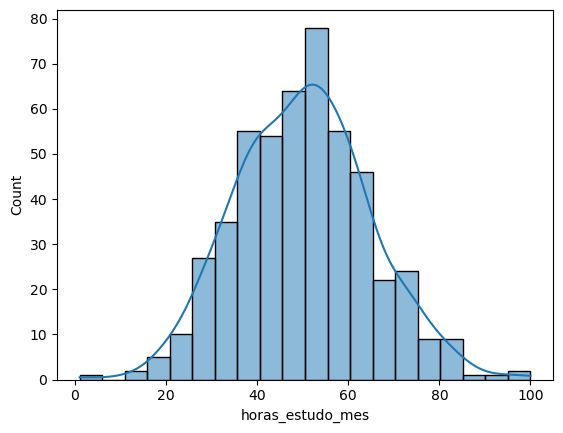

In [15]:
sns.histplot(data = df_dsa, x = "horas_estudo_mes", kde=True)

# Preparação dos dados

In [17]:
# Prepara a variavel x para entrada
X = np.array(df_dsa["horas_estudo_mes"])

In [18]:
type(X)

numpy.ndarray

In [19]:
# ajusta o shape de X
X = X.reshape(-1, 1)

In [20]:
# prepara a variavel alvo
y = df_dsa["salario"]

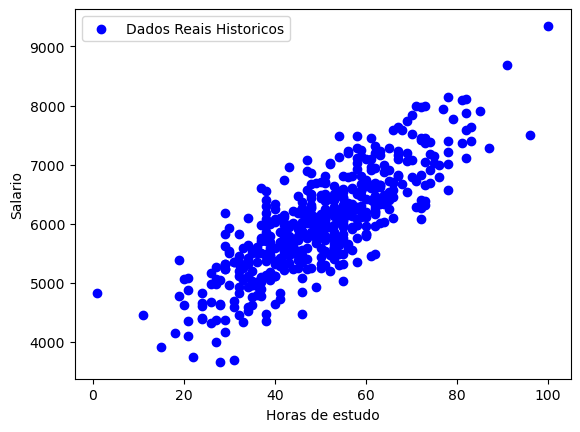

In [21]:
# Grafico de dispersão entre X e y
plt.scatter(X, y, color = "blue", label = "Dados Reais Historicos")
plt.xlabel("Horas de estudo")
plt.ylabel("Salario")
plt.legend()
plt.show()

In [23]:
# dividindo entre treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=  0.2, random_state = 42) 

In [25]:
X_treino.shape # matriz

(400, 1)

In [26]:
X_teste.shape

(100, 1)

In [27]:
y_treino.shape # coluna

(400,)

In [28]:
y_teste.shape

(100,)

# Modelagem preditiva

In [29]:
# Modelo de regressão linear simples
modelo = LinearRegression()

In [30]:
modelo.fit(X_treino, y_treino)

LinearRegression()

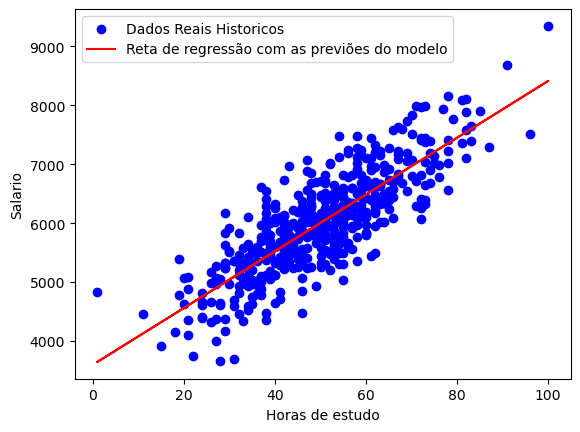

In [31]:
# visualise a reta de regressão
plt.scatter(X, y, color="blue", label="Dados Reais Historicos")
plt.plot(X, modelo.predict(X), color = "red", label="Reta de regressão com as previões do modelo")
plt.xlabel("Horas de estudo")
plt.ylabel("Salario")
plt.legend()
plt.show()

In [37]:
score = modelo.score(X_teste, y_teste)
print(f"Coeficiente R^2: {score:.2f}")

Coeficiente R^2: 0.59


In [38]:
# intercepta o parametro w0
modelo.intercept_

3596.7837243727536

In [39]:
modelo.coef_

array([48.18185277])

# Deploy do modelo

In [46]:
# define um novo valor para horas de estudo
horas_estudo_novo = np.array([[48]])

# Faz a previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"se voce estudar: {horas_estudo_novo} por mês, seu salario pode ser igual a {salario_previsto}")

se voce estudar: [[48]] por mês, seu salario pode ser igual a [5909.5126574]


In [47]:
# mesmo resultado anterior usando os parametros aprendidos pelo modelo
# y_novo = w0 + (w1 * x)
salario = modelo.intercept_ + (modelo.coef_ * horas_estudo_novo)
salario

array([[5909.5126574]])

In [48]:
# define um novo valor para horas de estudo
horas_estudo_novo = np.array([[65]])

# Faz a previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"se voce estudar: {horas_estudo_novo} por mês, seu salario pode ser igual a {salario_previsto}")

se voce estudar: [[65]] por mês, seu salario pode ser igual a [6728.60415452]


In [49]:
# define um novo valor para horas de estudo
horas_estudo_novo = np.array([[90]])

# Faz a previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"se voce estudar: {horas_estudo_novo} por mês, seu salario pode ser igual a {salario_previsto}")

se voce estudar: [[90]] por mês, seu salario pode ser igual a [7933.1504738]
